# Relevant Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as sm
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

# Reading the dataset

In [16]:
data=pd.read_csv('canna')

In [17]:
data.head()

,Unnamed: 0,Gender,Age,Department,College,CU,FT,ACCESS,FS,OU,...,SE,SU,EF,UWF,FEU,HU,LU,P/S,OUCF,HSCU
0,1,Female,25 - 29 years,Economics and Statistics,Humanities,No,NaN,NaN,At home,NaN,...,Negative,NaN,No,NaN,No,Yes,No,NaN,NaN,NaN
1,2,Female,20 - 24 years,Economics and Statistics,Humanities,No,NaN,NaN,From a friend,NaN,...,No effect,NaN,No,NaN,No,Yes,No,NaN,NaN,NaN
2,3,Male,20 - 24 years,Information Technology,Basic and Applied Sciences,Yes,Other,Yes,From a friend,Monthly,...,Negative,No,Yes,1 - 5 times,No,Yes,Yes,Both,1 - 5 times,Yes
3,4,Male,20 - 24 years,Statistics and Actuarial Science,Basic and Applied Sciences,No,NaN,NaN,On campus,NaN,...,No effect,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN
4,5,Male,20 - 24 years,Mathematical sciences,Basic and Applied Sciences,No,NaN,NaN,On campus,NaN,...,Negative,NaN,No,NaN,No,Yes,No,NaN,NaN,NaN


In [18]:
data.shape

(335, 29)

# Preliminary Data Cleaning

In [19]:
data.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Department', 'College', 'CU', 'FT',
       'ACCESS', 'FS', 'OU', 'TU', 'MODE', 'PURPOSE', 'CPM', 'GPA', 'CA', 'SH',
       'EMC', 'EMA', 'SE', 'SU', 'EF', 'UWF', 'FEU', 'HU', 'LU', 'P/S', 'OUCF',
       'HSCU'],
      dtype='object')

Dropping unnecessary columns

In [20]:
data=data.drop(columns='Unnamed: 0')

In [21]:
data.head()

,Gender,Age,Department,College,CU,FT,ACCESS,FS,OU,TU,...,SE,SU,EF,UWF,FEU,HU,LU,P/S,OUCF,HSCU
0,Female,25 - 29 years,Economics and Statistics,Humanities,No,NaN,NaN,At home,NaN,NaN,...,Negative,NaN,No,NaN,No,Yes,No,NaN,NaN,NaN
1,Female,20 - 24 years,Economics and Statistics,Humanities,No,NaN,NaN,From a friend,NaN,NaN,...,No effect,NaN,No,NaN,No,Yes,No,NaN,NaN,NaN
2,Male,20 - 24 years,Information Technology,Basic and Applied Sciences,Yes,Other,Yes,From a friend,Monthly,Hybrid,...,Negative,No,Yes,1 - 5 times,No,Yes,Yes,Both,1 - 5 times,Yes
3,Male,20 - 24 years,Statistics and Actuarial Science,Basic and Applied Sciences,No,NaN,NaN,On campus,NaN,NaN,...,No effect,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN
4,Male,20 - 24 years,Mathematical sciences,Basic and Applied Sciences,No,NaN,NaN,On campus,NaN,NaN,...,Negative,NaN,No,NaN,No,Yes,No,NaN,NaN,NaN


Dealing with Missing Values

In [22]:
# Let us investigate these missing values
missing_values = round(data.isnull().sum() / data.shape[0] * 100,2)

# Filter to only include columns with missing values and print
missing_columns = missing_values[missing_values > 0]
missing_columns
     

FT         74.93
ACCESS     74.93
OU         74.93
TU         74.93
MODE       74.93
PURPOSE    74.93
CPM        74.93
EMC        75.52
EMA        75.22
SU         74.93
UWF        74.93
P/S        74.93
OUCF       74.93
HSCU       75.52
dtype: float64

Since HSCU,OUCF,P/S,UWF,SU,EMA,EMC,CPM,PURPOSE,MODE,TU,OU,ACCESS,FT all have more than 50% missing\
values, we will simply drop them

In [23]:
data=data.drop(columns=['OUCF','P/S','UWF','SU','EMA','EMC','CPM','PURPOSE','MODE','TU','ACCESS','HSCU','OU','FT'])

In [24]:
data.head()

,Gender,Age,Department,College,CU,FS,GPA,CA,SH,SE,EF,FEU,HU,LU
0,Female,25 - 29 years,Economics and Statistics,Humanities,No,At home,2.00 - 2.99,Always,21 - 30 hours,Negative,No,No,Yes,No
1,Female,20 - 24 years,Economics and Statistics,Humanities,No,From a friend,3.00 - 3.59,Always,1 - 10 hours,No effect,No,No,Yes,No
2,Male,20 - 24 years,Information Technology,Basic and Applied Sciences,Yes,From a friend,3.60 - 4.00,Always,Above 30 hours,Negative,Yes,No,Yes,Yes
3,Male,20 - 24 years,Statistics and Actuarial Science,Basic and Applied Sciences,No,On campus,3.00 - 3.59,Always,21 - 30 hours,No effect,Yes,No,No,No
4,Male,20 - 24 years,Mathematical sciences,Basic and Applied Sciences,No,On campus,2.00 - 2.99,Always,11 - 20 hours,Negative,No,No,Yes,No


In [25]:
data.dtypes

Gender        object
Age           object
Department    object
College       object
CU            object
FS            object
GPA           object
CA            object
SH            object
SE            object
EF            object
FEU           object
HU            object
LU            object
dtype: object

In [26]:
data.nunique()

Gender          2
Age             4
Department    146
College         4
CU              2
FS              6
GPA             4
CA              3
SH              4
SE              3
EF              2
FEU             2
HU              2
LU              2
dtype: int64

In [27]:
data=data.drop(columns=['Department'])

In [28]:
data.columns

Index(['Gender', 'Age', 'College', 'CU', 'FS', 'GPA', 'CA', 'SH', 'SE', 'EF',
       'FEU', 'HU', 'LU'],
      dtype='object')

In [29]:
data.columns=['Gender', 'Age', 'College', 'Cannabis use', 'FS', 'GPA', 'Class attendance', 'Time spent studying',\
               'Social life effect', 'Friends use cannabis', 'Friends encouraged', 'Harmful', 'Legal']

# Exploratory Data Analysis

Categorical Feature

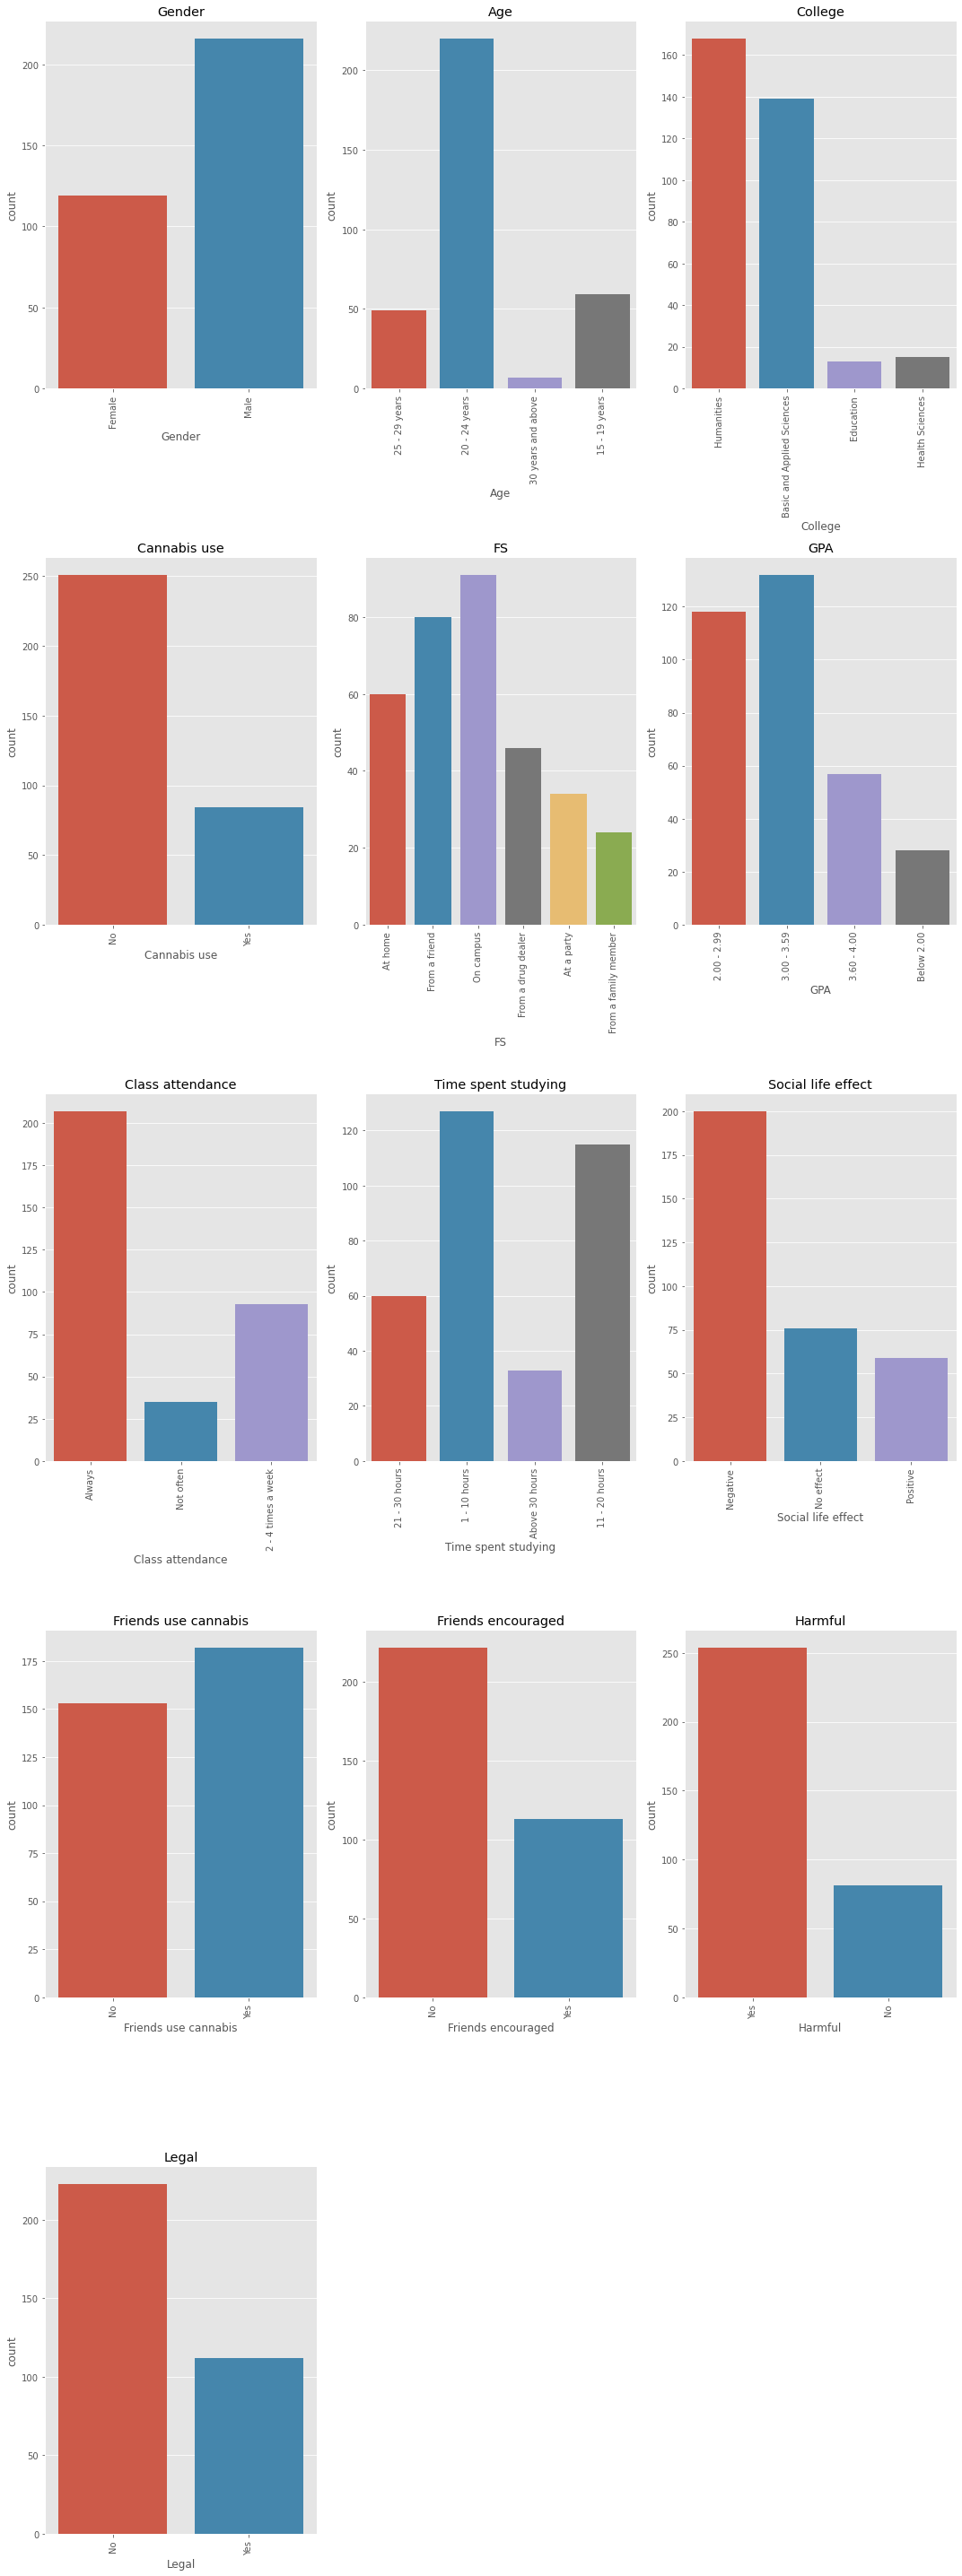

In [16]:
#Get names of all categorical feature

cat=data.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots

num_cols=len(cat)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,8*num_rows))
axes=axes.flatten()

# Create a countplot for the top 6  values 
for i, var in enumerate(cat):
    top_values=data[var].value_counts().nlargest(6).index
    filtered_data=data[data[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_data,ax=axes[i])
    axes[i].set_title(var)
    axes[i].tick_params(axis='x',rotation=90)
    
# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols,len(axes)):
        fig.delaxes(axes[i])
        
# Adjust spacing  between subplots
fig.tight_layout()

# Show plot
plt.show()

statistics by Gender

In [17]:
# Set the desired float formatting
pd.set_option('display.float_format', '{:.2f}'.format)

# describe the data in terms of Gender
data.groupby('Gender').describe().T

Gender                              Female                        Male
Age                  count             119                         216
                     unique              4                           4
                     top     20 - 24 years               20 - 24 years
                     freq               81                         139
College              count             119                         216
                     unique              4                           4
                     top        Humanities  Basic and Applied Sciences
                     freq               68                         100
Cannabis use         count             119                         216
                     unique              2                           2
                     top                No                          No
                     freq               93                         158
FS                   count             119                         216
                     unique              6                           6
                     top         On campus               From a friend
                     freq               40                          52
GPA                  count             119                         216
                     unique              4                           4
                     top       3.00 - 3.59                 2.00 - 2.99
                     freq               54                          85
Class attendance     count             119                         216
                     unique              3                           3
                     top            Always                      Always
                     freq               76                         131
Time spent studying  count             119                         216
                     unique              4                           4
                     top      1 - 10 hours                1 - 10 hours
                     freq               49                          78
Social life effect   count             119                         216
                     unique              3                           3
                     top          Negative                    Negative
                     freq               71                         129
Friends use cannabis count             119                         216
                     unique              2                           2
                     top                No                         Yes
                     freq               64                         127
Friends encouraged   count             119                         216
                     unique              2                           2
                     top                No                          No
                     freq               82                         140
Harmful              count             119                         216
                     unique              2                           2
                     top               Yes                         Yes
                     freq               93                         161
Legal                count             119                         216
                     unique              2                           2
                     top                No                          No
                     freq               88                         135

In [18]:
    # describe the data in terms of cannabis usage
data.groupby('Cannabis use').describe().T

Cannabis use                                         No                 Yes
Gender               count                          251                  84
                     unique                           2                   2
                     top                           Male                Male
                     freq                           158                  58
Age                  count                          251                  84
                     unique                           4                   4
                     top                  20 - 24 years       20 - 24 years
                     freq                           173                  47
College              count                          251                  84
                     unique                           4                   4
                     top     Basic and Applied Sciences          Humanities
                     freq                           125                  65
FS                   count                          251                  84
                     unique                           6                   6
                     top                      On campus       From a friend
                     freq                            77                  23
GPA                  count                          251                  84
                     unique                           4                   4
                     top                    3.00 - 3.59         2.00 - 2.99
                     freq                           109                  45
Class attendance     count                          251                  84
                     unique                           3                   3
                     top                         Always  2 - 4 times a week
                     freq                           188                  52
Time spent studying  count                          251                  84
                     unique                           4                   4
                     top                   1 - 10 hours       11 - 20 hours
                     freq                           113                  44
Social life effect   count                          251                  84
                     unique                           3                   3
                     top                       Negative            Positive
                     freq                           173                  43
Friends use cannabis count                          251                  84
                     unique                           2                   2
                     top                             No                 Yes
                     freq                           147                  78
Friends encouraged   count                          251                  84
                     unique                           2                   2
                     top                             No                 Yes
                     freq                           194                  56
Harmful              count                          251                  84
                     unique                           2                   2
                     top                            Yes                 Yes
                     freq                           208                  46
Legal                count                          251                  84
                     unique                           2                   2
                     top                             No                 Yes
                     freq                           212                  73

In [19]:
data.head()

,Gender,Age,College,Cannabis use,FS,GPA,Class attendance,Time spent studying,Social life effect,Friends use cannabis,Friends encouraged,Harmful,Legal
0,Female,25 - 29 years,Humanities,No,At home,2.00 - 2.99,Always,21 - 30 hours,Negative,No,No,Yes,No
1,Female,20 - 24 years,Humanities,No,From a friend,3.00 - 3.59,Always,1 - 10 hours,No effect,No,No,Yes,No
2,Male,20 - 24 years,Basic and Applied Sciences,Yes,From a friend,3.60 - 4.00,Always,Above 30 hours,Negative,Yes,No,Yes,Yes
3,Male,20 - 24 years,Basic and Applied Sciences,No,On campus,3.00 - 3.59,Always,21 - 30 hours,No effect,Yes,No,No,No
4,Male,20 - 24 years,Basic and Applied Sciences,No,On campus,2.00 - 2.99,Always,11 - 20 hours,Negative,No,No,Yes,No


In [20]:
data.describe()

,Gender,Age,College,Cannabis use,FS,GPA,Class attendance,Time spent studying,Social life effect,Friends use cannabis,Friends encouraged,Harmful,Legal
count,335,335,335,335,335,335,335,335,335,335,335,335,335
unique,2,4,4,2,6,4,3,4,3,2,2,2,2
top,Male,20 - 24 years,Humanities,No,On campus,3.00 - 3.59,Always,1 - 10 hours,Negative,Yes,No,Yes,No
freq,216,220,168,251,91,132,207,127,200,182,222,254,223


In [247]:
sns.set(rc={'figure.figsize':(10,5)})

<AxesSubplot:xlabel='Gender', ylabel='Density'>

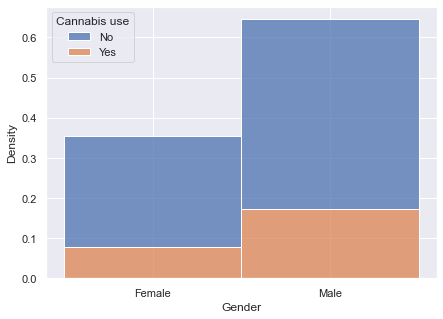

In [151]:
sns.histplot(binwidth=0.5, x="Gender", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='Age', ylabel='Density'>

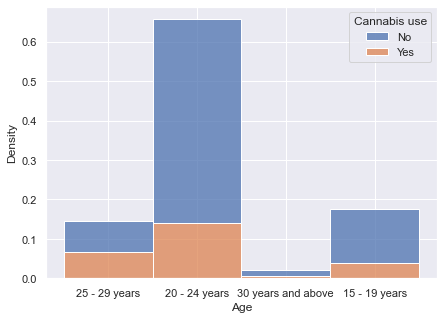

In [152]:
sns.histplot(binwidth=0.1, x="Age", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='GPA', ylabel='Density'>

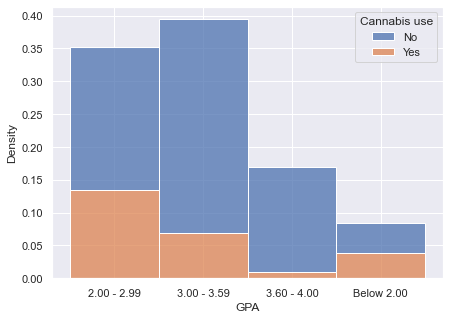

In [153]:
sns.histplot(binwidth=0.5, x="GPA", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='Friends use cannabis', ylabel='Density'>

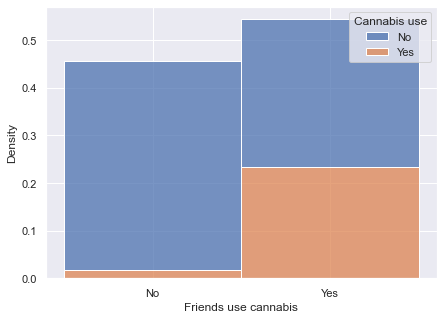

In [155]:
sns.histplot(binwidth=0.5, x="Friends use cannabis", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='Harmful', ylabel='Density'>

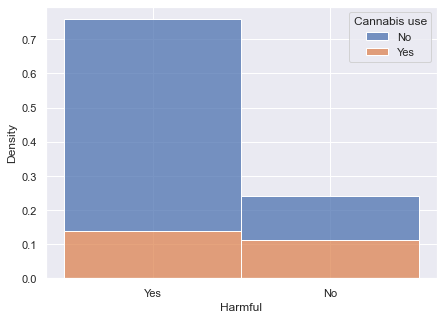

In [156]:
sns.histplot(binwidth=0.5, x="Harmful", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='Social life effect', ylabel='Density'>

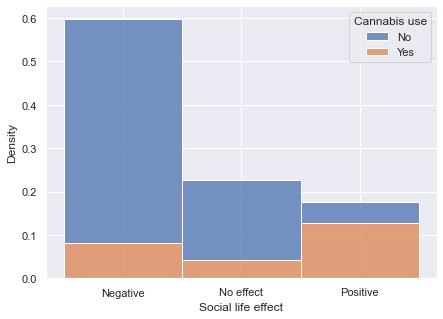

In [157]:
sns.histplot(binwidth=0.5, x="Social life effect", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='FS', ylabel='Density'>

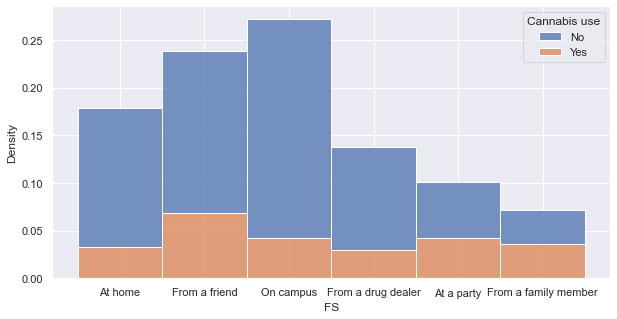

In [162]:
sns.histplot(binwidth=0.5, x="FS", hue="Cannabis use", data=data, stat="density", multiple="stack")

<AxesSubplot:xlabel='Legal', ylabel='Density'>

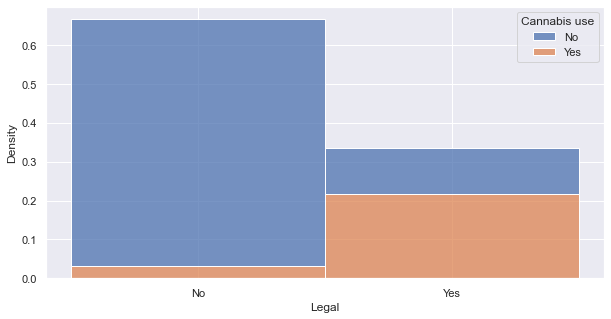

In [163]:
sns.histplot(binwidth=0.5, x="Legal", hue="Cannabis use", data=data, stat="density", multiple="stack")

In [245]:
data.columns


Index(['Gender', 'Age', 'College', 'Cannabis use', 'FS', 'GPA',
       'Class attendance', 'Time spent studying', 'Social life effect',
       'Friends use cannabis', 'Friends encouraged', 'Harmful', 'Legal'],
      dtype='object')

<AxesSubplot:xlabel='Friends encouraged', ylabel='Density'>

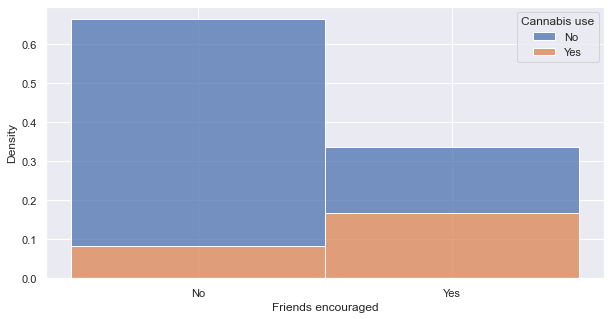

In [248]:
sns.histplot(binwidth=0.5, x="Friends encouraged", hue="Cannabis use", data=data, stat="density", multiple="stack")

# Label Encoding

In [21]:
for col in data.select_dtypes(include=['object']).columns:
    print(f'{col}:{data[col].unique()}')

Gender:['Female' 'Male']
Age:['25 - 29 years' '20 - 24 years' '30 years and above' '15 - 19 years']
College:['Humanities' 'Basic and Applied Sciences' 'Education' 'Health Sciences']
Cannabis use:['No' 'Yes']
FS:['At home' 'From a friend' 'On campus' 'From a drug dealer' 'At a party'
 'From a family member']
GPA:['2.00 - 2.99' '3.00 - 3.59' '3.60 - 4.00' 'Below 2.00']
Class attendance:['Always' 'Not often' '2 - 4 times a week']
Time spent studying:['21 - 30 hours' '1 - 10 hours' 'Above 30 hours' '11 - 20 hours']
Social life effect:['Negative' 'No effect' 'Positive']
Friends use cannabis:['No' 'Yes']
Friends encouraged:['No' 'Yes']
Harmful:['Yes' 'No']
Legal:['No' 'Yes']


In [22]:
from sklearn import preprocessing
for col in data.select_dtypes(include=['object']).columns:
    
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])
    
    print(f'{col}: {data[col].unique()}')

Gender: [0 1]
Age: [2 1 3 0]
College: [3 0 1 2]
Cannabis use: [0 1]
FS: [1 4 5 2 0 3]
GPA: [0 1 2 3]
Class attendance: [1 2 0]
Time spent studying: [2 0 3 1]
Social life effect: [0 1 2]
Friends use cannabis: [0 1]
Friends encouraged: [0 1]
Harmful: [1 0]
Legal: [0 1]


Inspecting our transformed data

In [23]:
data.head()

,Gender,Age,College,Cannabis use,FS,GPA,Class attendance,Time spent studying,Social life effect,Friends use cannabis,Friends encouraged,Harmful,Legal
0,0,2,3,0,1,0,1,2,0,0,0,1,0
1,0,1,3,0,4,1,1,0,1,0,0,1,0
2,1,1,0,1,4,2,1,3,0,1,0,1,1
3,1,1,0,0,5,1,1,2,1,1,0,0,0
4,1,1,0,0,5,0,1,1,0,0,0,1,0


# Correlation

<AxesSubplot:>

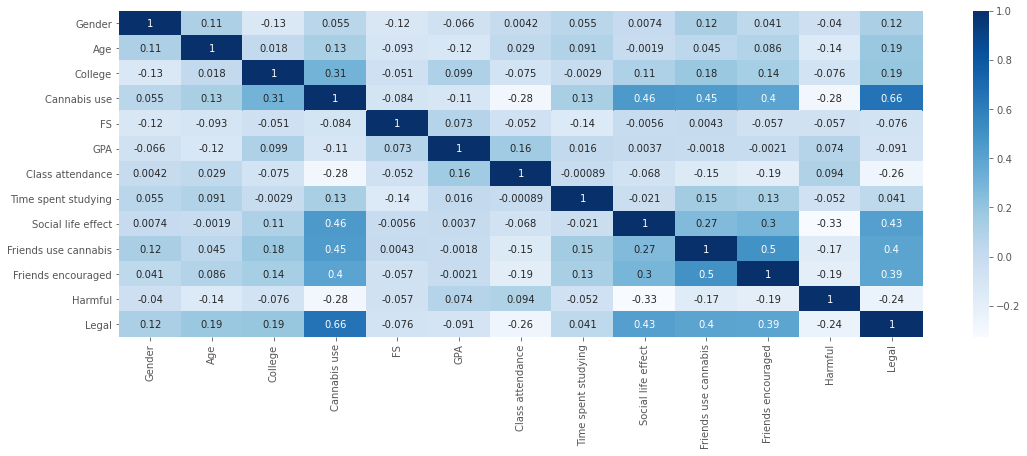

In [24]:
correlation=data.corr()
plt.figure(figsize=(18,6))
sns.heatmap(correlation,annot=True,cmap='Blues')

<AxesSubplot:xlabel='Cannabis use', ylabel='count'>

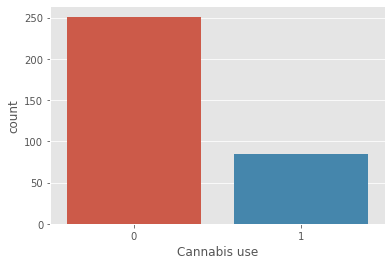

In [25]:
sns.countplot(data['Cannabis use'])

#Our target variable is highly imbalanced

# Machine Learning

In [26]:
# split data for feature selection

In [27]:
x=data.drop(columns='Cannabis use')
x.head()

,Gender,Age,College,FS,GPA,Class attendance,Time spent studying,Social life effect,Friends use cannabis,Friends encouraged,Harmful,Legal
0,0,2,3,1,0,1,2,0,0,0,1,0
1,0,1,3,4,1,1,0,1,0,0,1,0
2,1,1,0,4,2,1,3,0,1,0,1,1
3,1,1,0,5,1,1,2,1,1,0,0,0
4,1,1,0,5,0,1,1,0,0,0,1,0


In [28]:
y=data['Cannabis use']
y

0      0
1      0
2      1
3      0
4      0
      ..
330    0
331    0
332    0
333    1
334    1
Name: Cannabis use, Length: 335, dtype: int32

In [29]:
print(x.shape, y.shape)

(335, 12) (335,)


In [30]:
# f-test
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(x, y)

In [31]:
# create a dataframe for the f_classif values
f_test_df = pd.DataFrame(
    {
        "Feature": x.columns,
        "F_Statistics":f_stat,
        "p_value": f_p_value
    }
)
f_test_df.sort_values('p_value')

,Feature,F_Statistics,p_value
11,Legal,251.17,0.00
7,Social life effect,88.46,0.00
8,Friends use cannabis,83.36,0.00
9,Friends encouraged,64.56,0.00
2,College,35.59,0.00
10,Harmful,29.33,0.00
5,Class attendance,29.18,0.00
1,Age,5.70,0.02
6,Time spent studying,5.62,0.02
4,GPA,4.06,0.04


# Model Building

In [164]:
from sklearn.model_selection import train_test_split

# 1. Logistic Regression

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (268, 12)
y_train shape: (268,)
x_test shape: (67, 12)
y_test shape: (67,)


In [166]:
actual=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual'])])

# Train model on the imbalanced data

In [167]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [168]:
# build model
model = LogisticRegression(max_iter=1000)

# train model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [169]:
# training accuracy
model.score(x_train, y_train)

0.8917910447761194

In [170]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1])

In [171]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F1 score:',(f1_score(y_test,y_pred)))
print('Precision score:',(precision_score(y_test,y_pred)))
print('Recall score:',(recall_score(y_test,y_pred)))
print('Specificity score:',(recall_score(actual,y_pred,pos_label=0)))

F1 score: 0.6666666666666666
Precision score: 0.6428571428571429
Recall score: 0.6923076923076923
Specificity score: 0.9074074074074074


In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.64      0.69      0.67        13

    accuracy                           0.87        67
   macro avg       0.78      0.80      0.79        67
weighted avg       0.87      0.87      0.87        67



In [173]:
auc = np.round(roc_auc_score(actual, y_pred), 4)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.7999


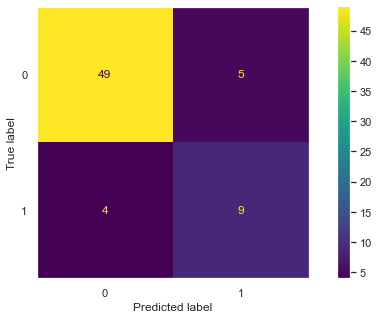

In [174]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,)
plt.grid(False)

# Train model on balanced data

In [175]:
# instantiate the samplers
oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()

In [176]:
# oversample the data
x_train_over, y_train_over = oversampler.fit_resample(x_train, y_train)

print("x_train_over shape:", x_train_over.shape)
print("y_train_over shape:", y_train_over.shape)

x_train_over shape: (394, 12)
y_train_over shape: (394,)


In [177]:
# undersample the data
x_train_under, y_train_under = undersampler.fit_resample(x_train, y_train)

print("x_train_under shape:", x_train_under.shape)
print("y_train_under shape:", y_train_under.shape)

x_train_under shape: (142, 12)
y_train_under shape: (142,)


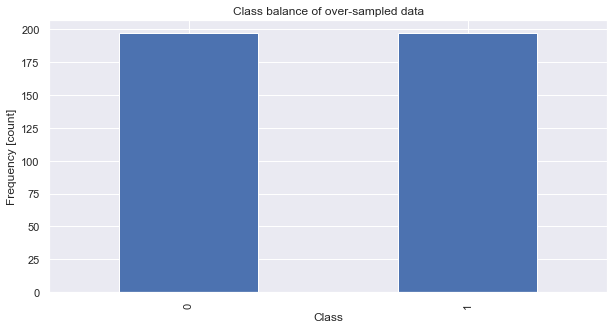

In [178]:
# plot the class balance of the over-sampled data
y_train_over.value_counts().plot.bar();

# label the axis
plt.xlabel("Class")
plt.ylabel("Frequency [count]")
plt.title("Class balance of over-sampled data");

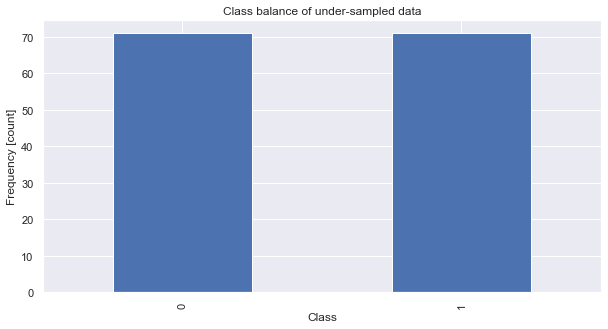

In [179]:
# plot the class balance of the under-sampled data
y_train_under.value_counts().plot.bar();

# label the axis
plt.xlabel("Class")
plt.ylabel("Frequency [count]")
plt.title("Class balance of under-sampled data");

In [180]:
# Define a hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs']  # Solver algorithm
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # The metric to optimize
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [181]:
# Perform grid search with cross-validation
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [182]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

## Oversampled

In [183]:
# Instantiate a new logistic regression model with the best hyperparameters
best_logreg_model = LogisticRegression(**best_params)
best_logreg_model


LogisticRegression(C=10)

In [184]:
# Fit the model on the oversampled training dataset
best_logreg_model.fit(x_train_over, y_train_over)

LogisticRegression(C=10)

In [185]:
# Make predictions on the test set
y_predo = best_logreg_model.predict(x_test)
y_predo

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1])

In [186]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F1 score:',(f1_score(y_test,y_predo)))
print('Precision score:',(precision_score(y_test,y_predo)))
print('Recall score:',(recall_score(y_test,y_predo)))
print('Specificity score:',(recall_score(actual,y_predo,pos_label=0)))

F1 score: 0.7586206896551724
Precision score: 0.6875
Recall score: 0.8461538461538461
Specificity score: 0.9074074074074074


In [187]:
#Model Evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predo))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.69      0.85      0.76        13

    accuracy                           0.90        67
   macro avg       0.82      0.88      0.85        67
weighted avg       0.91      0.90      0.90        67



In [188]:
auc = np.round(roc_auc_score(actual, y_predo), 4)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.8768


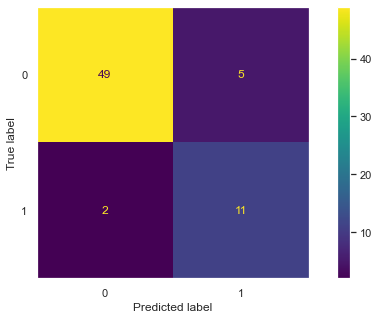

In [189]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(best_logreg_model, x_test, y_test,)
plt.grid(False)

## Undersampled

In [190]:
# Instantiate a new logistic regression model with the best hyperparameters
best_logreg_modelu = LogisticRegression(**best_params)
best_logreg_modelu

LogisticRegression(C=10)

In [191]:
# Fit the model on the undersampled training dataset
best_logreg_modelu.fit(x_train_under, y_train_under)

LogisticRegression(C=10)

In [192]:
# Make predictions on the test set
y_predu = best_logreg_modelu.predict(x_test)
y_predu

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1])

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predu))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.65      0.85      0.73        13

    accuracy                           0.88        67
   macro avg       0.80      0.87      0.83        67
weighted avg       0.90      0.88      0.89        67



In [194]:
print('Specificity score:',(recall_score(actual,y_predu,pos_label=0)))

Specificity score: 0.8888888888888888


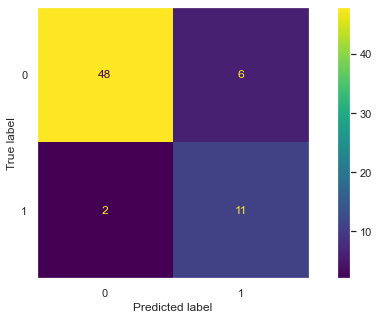

In [195]:
# create a confusion matrix for model analysis
ConfusionMatrixDisplay.from_estimator(best_logreg_modelu, x_test, y_test)
plt.grid(False)

In [196]:
auc = np.round(roc_auc_score(actual, y_predu), 4)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.8675


# Random Forest

## Unbalanced

In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [198]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [199]:
Y_predict=model.predict(x_test)
#Y_predict=model.predict_proba(X_test)

In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.67      0.62      0.64        13

    accuracy                           0.87        67
   macro avg       0.79      0.77      0.78        67
weighted avg       0.86      0.87      0.86        67



In [201]:
print('Specificity score:',(recall_score(actual,Y_predict,pos_label=0)))

Specificity score: 0.9259259259259259


In [202]:
auc = np.round(roc_auc_score(actual, Y_predict), 4)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.7707


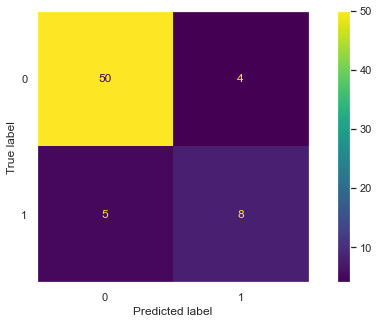

In [203]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,)
plt.grid(False)

## Balanced

In [204]:
model.fit(x_train_under, y_train_under)

RandomForestClassifier()

In [205]:
Y_predict=model.predict(x_test)

In [206]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F1 score:',(f1_score(y_test,Y_predict)))
print('Precision score:',(precision_score(y_test,Y_predict)))
print('Recall score:',(recall_score(y_test,Y_predict)))
print('Specificity score:',(recall_score(actual,Y_predict,pos_label=0)))

F1 score: 0.6428571428571429
Precision score: 0.6
Recall score: 0.6923076923076923
Specificity score: 0.8888888888888888


In [207]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        54
           1       0.60      0.69      0.64        13

    accuracy                           0.85        67
   macro avg       0.76      0.79      0.77        67
weighted avg       0.86      0.85      0.85        67



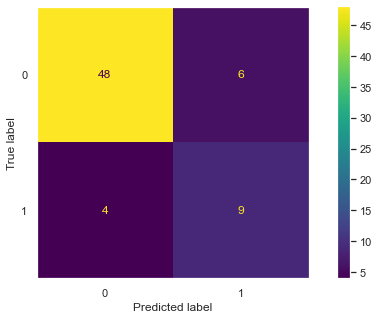

In [208]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,)
plt.grid(False)

In [209]:
auc = np.round(roc_auc_score(actual, Y_predict), 4)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.7906


# Decision Tree

## Imbalanced

In [210]:
from sklearn.tree import DecisionTreeClassifier
model_d = DecisionTreeClassifier()

In [211]:
model_d.fit(x_train,y_train)

DecisionTreeClassifier()

In [212]:
pred_d=model_d.predict(x_test)
#Y_predict=model.predict_proba(X_test)

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_d))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.57      0.62      0.59        13

    accuracy                           0.84        67
   macro avg       0.74      0.75      0.74        67
weighted avg       0.84      0.84      0.84        67



In [214]:
print('Specificity score:',(recall_score(actual,pred_d,pos_label=0)))

Specificity score: 0.8888888888888888


In [215]:
auc = np.round(roc_auc_score(actual, pred_d), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.752


## Balanced

In [216]:
model_d.fit(x_train_under, y_train_under)

DecisionTreeClassifier()

In [217]:
pred_d=model_d.predict(x_test)
#Y_predict=model.predict_proba(X_test)

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_d))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        54
           1       0.55      0.92      0.69        13

    accuracy                           0.84        67
   macro avg       0.76      0.87      0.79        67
weighted avg       0.89      0.84      0.85        67



In [219]:
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import load_boston

dtree=DecisionTreeClassifier()

param_grid={'max_depth':[2,4,6,8],
            'min_samples_split':[2,4,6,8],
            'min_samples_leaf':[1,2,3,4],
            'max_features':['auto','sqrt','log2'],
            'random_state':[0,42]
    
}

# Create a GridSearchCV object
grid_search= GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [220]:
dclass=DecisionTreeClassifier(random_state=0,max_features='sqrt',max_depth=4,min_samples_split=2,min_samples_leaf=3)
dclass.fit(x_train_under,y_train_under)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=3,
                       random_state=0)

In [221]:
pred_d=dclass.predict(x_test)
#Y_predict=model.predict_proba(X_

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_d))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.62      0.77      0.69        13

    accuracy                           0.87        67
   macro avg       0.78      0.83      0.80        67
weighted avg       0.88      0.87      0.87        67



In [91]:
print('Specificity score:',(recall_score(actual,pred_d,pos_label=0)))

Specificity score: 0.7962962962962963


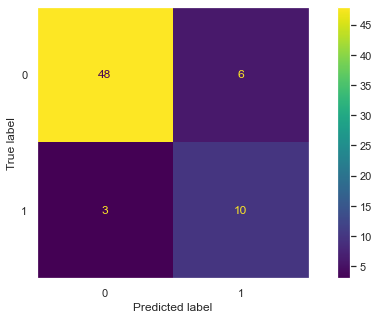

In [223]:
ConfusionMatrixDisplay.from_estimator(dclass, x_test, y_test,)
plt.grid(False)

In [92]:
# y_pred_proba=dclass.predict_proba(x_test)[:][:,]

# actual=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual'])])

In [93]:
#actual.index=y_test.index

In [94]:
auc = np.round(roc_auc_score(actual, pred_d), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.706


# KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
 
# Predictions and Evaluations
# Let's evaluate our KNN model !
#print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.64      0.54      0.58        13

    accuracy                           0.85        67
   macro avg       0.76      0.73      0.75        67
weighted avg       0.84      0.85      0.85        67



In [226]:
print('Specificity score:',(recall_score(actual,pred,pos_label=0)))

Specificity score: 0.9259259259259259


In [227]:
auc = np.round(roc_auc_score(actual,pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.732


## Balanced

In [228]:
knn.fit(x_train_under, y_train_under)

KNeighborsClassifier(n_neighbors=1)

In [229]:
pred = knn.predict(x_test)

In [230]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.57      0.62      0.59        13

    accuracy                           0.84        67
   macro avg       0.74      0.75      0.74        67
weighted avg       0.84      0.84      0.84        67



In [231]:
print('Specificity score:',(recall_score(actual,pred,pos_label=0)))

Specificity score: 0.8888888888888888


In [232]:
auc = np.round(roc_auc_score(actual,pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.752


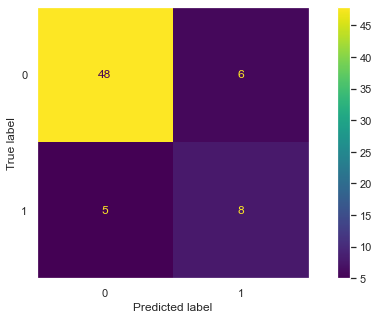

In [233]:
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test,)
plt.grid(False)

# SHAP

In [104]:
import shap

In [105]:
masker = shap.maskers.Independent(data=x_test)

In [106]:
explainer = shap.LinearExplainer(best_logreg_model,masker=masker)

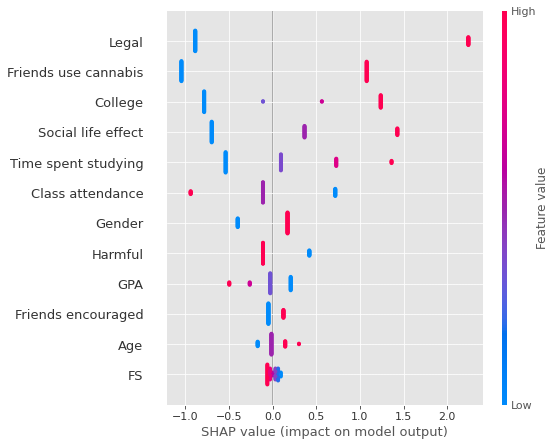

In [107]:
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

In [108]:
shap_values = explainer(x)

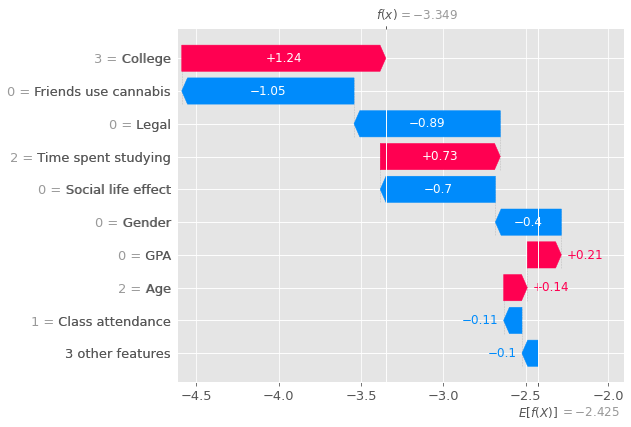

In [109]:
shap.plots.waterfall(shap_values[0])